# Data Visualisation Project on Violence Against Women Dataset

### Importing Libraries

In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset and Pre-processing

In [4]:
# Read dataset and view information about dataset
df = pd.read_csv('C:\\Users\\user\\Downloads\\Violence Against Women  Girls Data.csv')
df

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8
...,...,...,...,...,...,...,...,...
12595,210,Zimbabwe,M,Residence,Urban,... if she goes out without telling him,01/01/2015,11.8
12596,280,Zimbabwe,M,Residence,Rural,... if she neglects the children,01/01/2015,20.1
12597,280,Zimbabwe,M,Residence,Urban,... if she neglects the children,01/01/2015,15.0
12598,350,Zimbabwe,M,Residence,Rural,... if she refuses to have sex with him,01/01/2015,7.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               12600 non-null  int64  
 1   Country                12600 non-null  object 
 2   Gender                 12600 non-null  object 
 3   Demographics Question  12600 non-null  object 
 4   Demographics Response  12600 non-null  object 
 5   Question               12600 non-null  object 
 6   Survey Year            12600 non-null  object 
 7   Value                  11187 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 787.6+ KB


In [6]:
# Check for missing values in the dataset
df.isnull().sum()

RecordID                    0
Country                     0
Gender                      0
Demographics Question       0
Demographics Response       0
Question                    0
Survey Year                 0
Value                    1413
dtype: int64

In [7]:
#drop null values
df = df.dropna(subset = ["Value"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11187 entries, 1 to 12599
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               11187 non-null  int64  
 1   Country                11187 non-null  object 
 2   Gender                 11187 non-null  object 
 3   Demographics Question  11187 non-null  object 
 4   Demographics Response  11187 non-null  object 
 5   Question               11187 non-null  object 
 6   Survey Year            11187 non-null  object 
 7   Value                  11187 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 786.6+ KB


In [8]:
# Check for duplicate values
duplicates = df[df.duplicated()]
print('Dulpicates in the dataframe\n',duplicates)

Dulpicates in the dataframe
 Empty DataFrame
Columns: [RecordID, Country, Gender, Demographics Question, Demographics Response, Question, Survey Year, Value]
Index: []


In [9]:
#Delete RecordID column from the dataset
df = df.drop(columns=["RecordID"])
df

,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8
5,Afghanistan,F,Employment,Employed for kind,... if she burns the food,01/01/2015,17.0
...,...,...,...,...,...,...,...
12595,Zimbabwe,M,Residence,Urban,... if she goes out without telling him,01/01/2015,11.8
12596,Zimbabwe,M,Residence,Rural,... if she neglects the children,01/01/2015,20.1
12597,Zimbabwe,M,Residence,Urban,... if she neglects the children,01/01/2015,15.0
12598,Zimbabwe,M,Residence,Rural,... if she refuses to have sex with him,01/01/2015,7.2


### Visualisation 1: Seeing the Big Picture 1

In [14]:
# Calculating the mean value for each country
mean_values = df.groupby('Country')['Value'].mean().reset_index()
# Creating an interactive choropleth map
fig = px.choropleth(
    mean_values,
    locations="Country",
    locationmode="country names",
    color="Value",
    hover_name="Country",
    color_continuous_scale="Rainbow",
    title="Mean Violence Against Women by Country"
)
# Adjusting the title's position 
fig.update_layout(
    title=dict(
        text="Mean Violence Against Women by Country",
        x=0.5, y=0.95, xanchor='center', yanchor='top'  
    )
)
# Customizing the legend
fig.update_coloraxes(colorbar_title="Average Value")
fig.update_layout(
    coloraxis_colorbar=dict(
        tickformat=".2f",
        x=0.95, y=0.45, thickness=15  
    )
)
# Showing the interactive map
fig.show()

### Visualisation 2: Seeing the Big picture 2

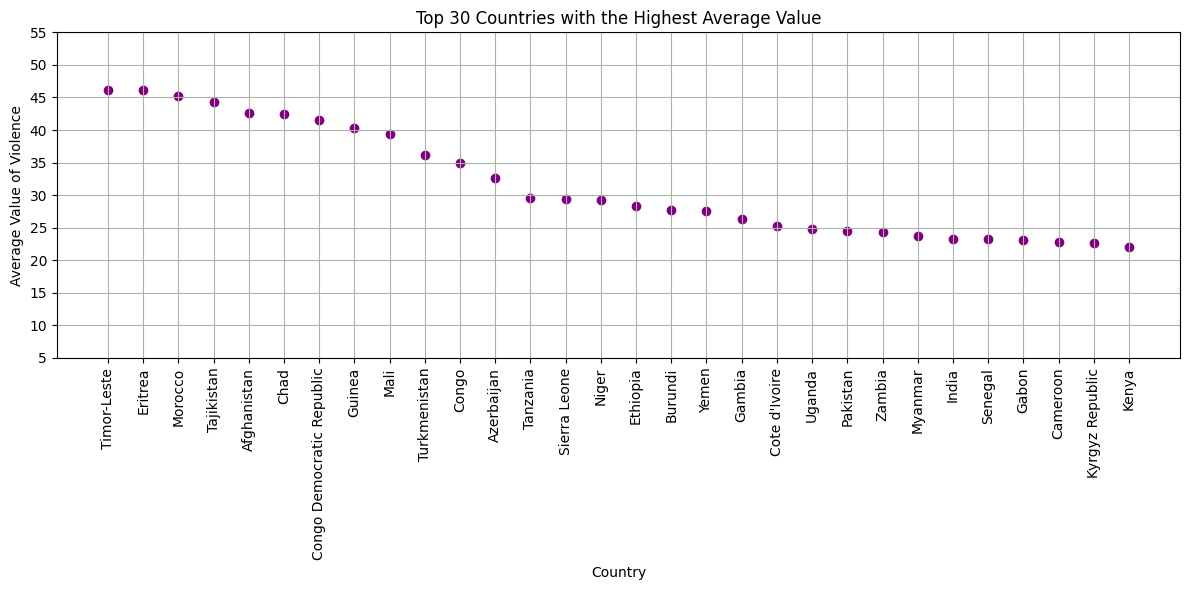

In [15]:
# Calculating the average value of the 'Value' column for each country
average_values = df.groupby('Country')['Value'].mean()
# Sorting the average values in descending order and select the top 20
top_20_values = average_values.sort_values(ascending=False).head(30)
# Creating a scatter plot to visualize the sorted average values
plt.figure(figsize=(12, 6))
plt.scatter(top_20_values.index, top_20_values, marker='o', 
color='purple', label='Average Value')
# Customizing the plot
plt.title('Top 30 Countries with the Highest Average Value')
plt.xlabel('Country')
plt.ylabel('Average Value of Violence')
plt.xticks(rotation=90)
plt.grid(True)
plt.yticks(range(5, 60, 5))
# Showing the plot
plt.tight_layout()
plt.show()

### Visualisation 3: The Different Faces of Violence

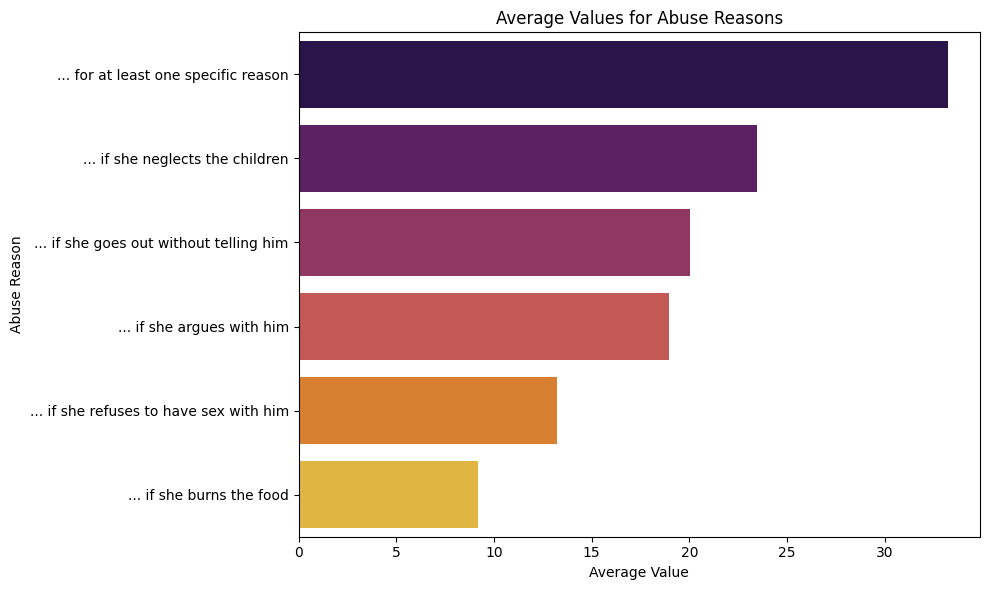

In [17]:
# Group the DataFrame by 'AbuseReason' and calculate the mean of 'Value' for each reason
mean_values = df.groupby('Question')['Value'].mean().reset_index()
# Sort the DataFrame by the average value in descending order
mean_values = mean_values.sort_values(by='Value', ascending=False)
# Create a bar chart to visualize the average values for each reason 
plt.figure(figsize=(10, 6))
sns.barplot(x='Value', y='Question', data=mean_values, 
palette='inferno')
plt.title('Average Values for Abuse Reasons')
plt.xlabel('Average Value')
plt.ylabel('Abuse Reason')
# Show the plot
plt.tight_layout()
plt.show()

### Visualisation 4: Who is most vulnerable?

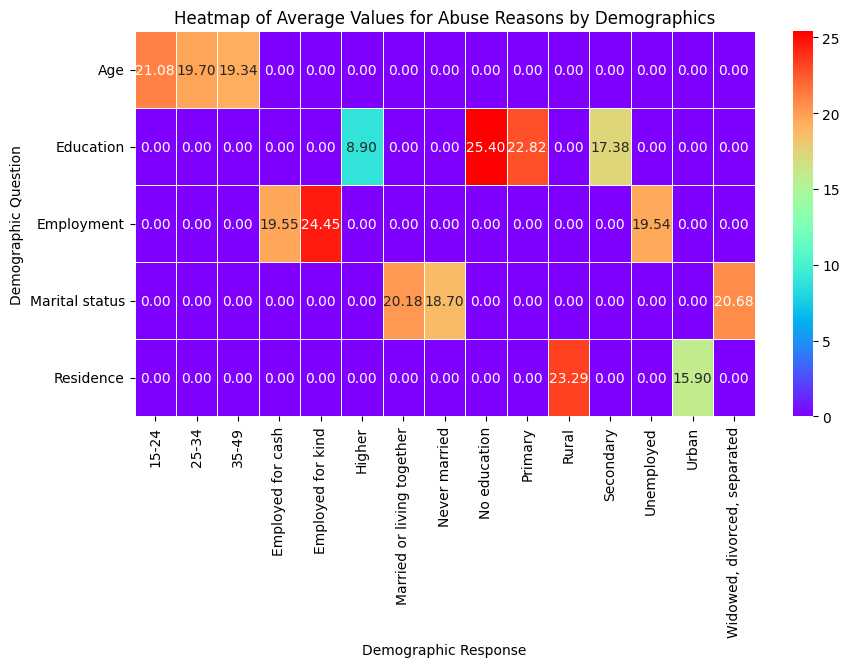

In [21]:
# Grouping the DataFrame by 'Demographics Question' and 'Demographics Response' and calculate the mean of 'Value'
heatmap_data = df.groupby(['Demographics Question', 'Demographics Response'])['Value'].mean().reset_index()
# Pivot the DataFrame to create a matrix for the heatmap
heatmap_data = heatmap_data.pivot_table(
index='Demographics Question', columns='Demographics Response', 
values='Value', fill_value=0
)
# Create the heatmap using Seaborn
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, annot=True, cmap='rainbow', fmt='.2f', 
linewidths=0.5)
plt.title('Heatmap of Average Values for Abuse Reasons by Demographics')
plt.xlabel('Demographic Response')
plt.ylabel('Demographic Question')
# Show the plot
plt.show()

### Visualisation 5: Considering Everyone's Story?

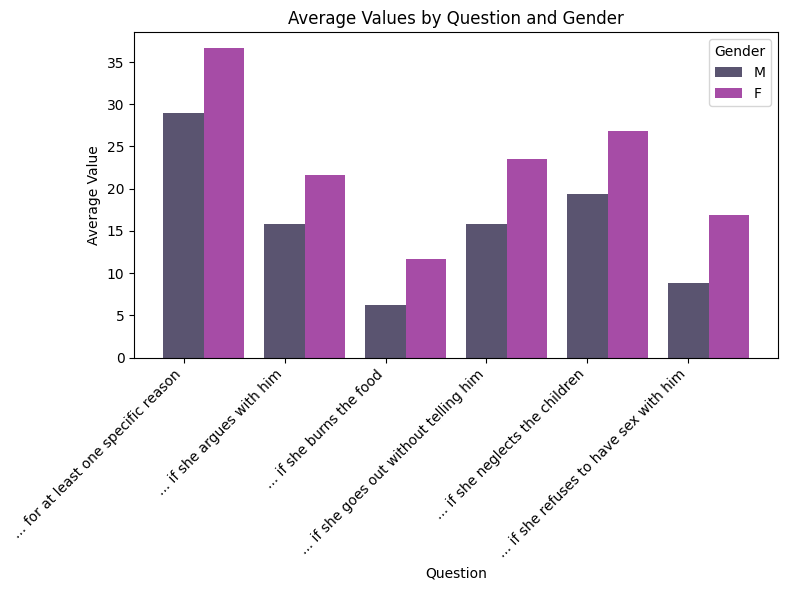

In [23]:
# Calculate the average value of the 'Value' column for each question and gender
average_values = df.groupby(['Question', 'Gender'])['Value'].mean().unstack()
# Define custom colors for male and female bars
colors = {'M': '#140b34', 'F': 'purple'}
# Create a grouped bar chart
plt.figure(figsize=(8, 6))
# Plot the grouped bar chart for male and female responses with custom colors
bar_width = 0.4
index = range(len(average_values.index))
for gender, color in colors.items():
    plt.bar( [i + (bar_width if gender == 'M' else 2 * bar_width) for i in index], average_values[gender],
                width=bar_width, label=gender, align='center', alpha=0.7, color=color)
# Customize the plot
plt.title('Average Values by Question and Gender')
plt.xlabel('Question')
plt.ylabel('Average Value')
plt.xticks([i + bar_width for i in index], average_values.index, 
rotation=45, ha='right')
plt.legend(title='Gender')
# Show the plot
plt.tight_layout()
plt.show()

In [31]:
### Visualisation 6: Education and violence

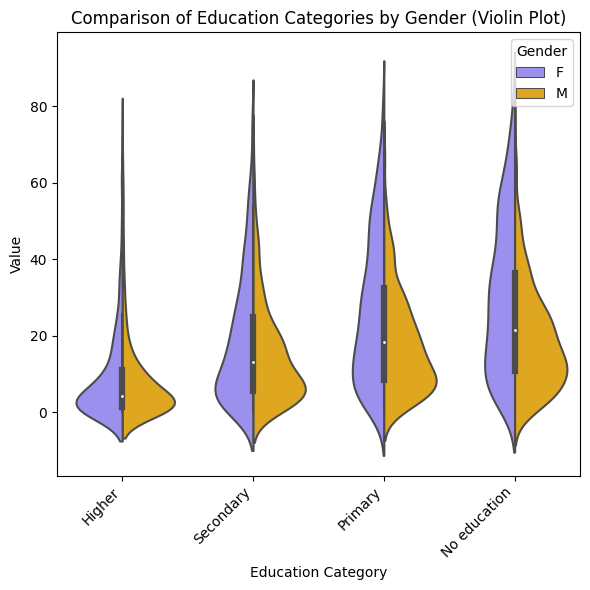

In [24]:
education_data = df[df['Demographics Question'] == 'Education']
plt.figure(figsize=(6, 6))
sns.violinplot(
data=education_data,
x='Demographics Response',
y='Value',
hue='Gender',
palette={'M': '#ffb400', 'F': '#9080ff'},
split=True
)
plt.title('Comparison of Education Categories by Gender (Violin Plot)')
plt.xlabel('Education Category')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [32]:
### Visualisation 7: Regional insights

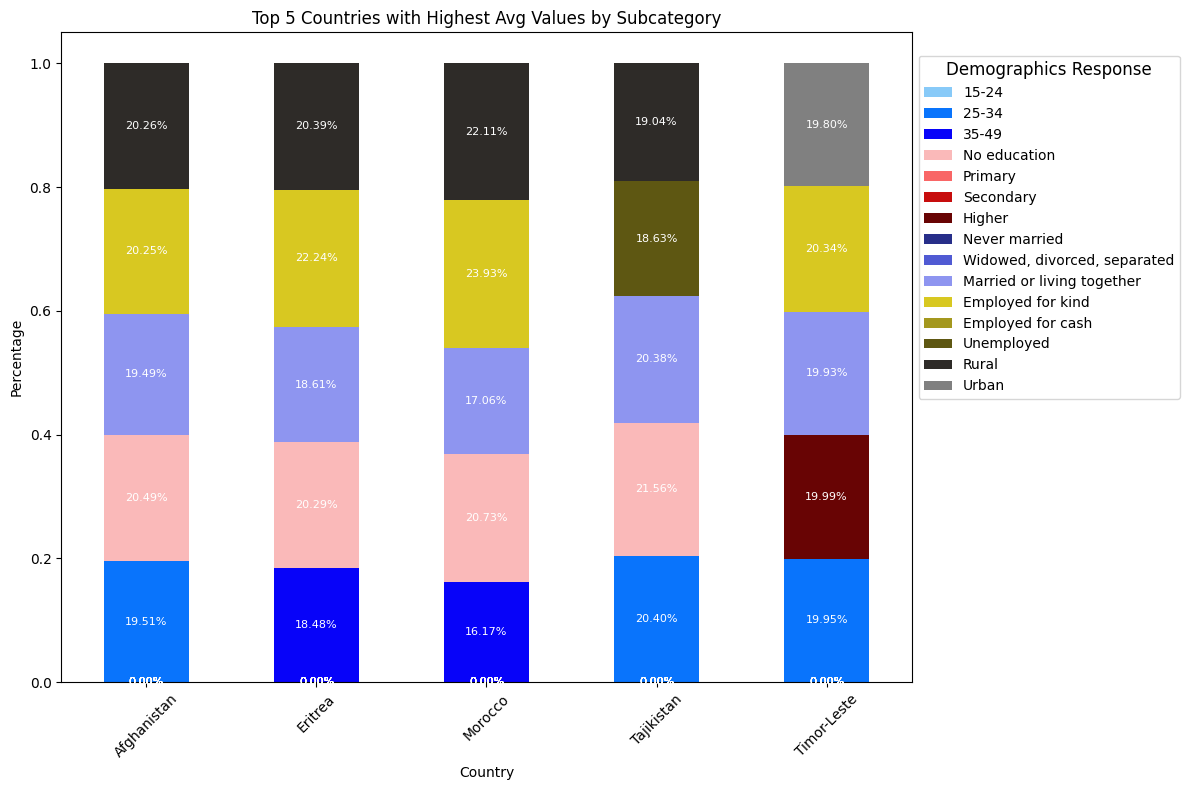

In [28]:
# Group by Country, Category, and Subcategory and calculate the average value
grouped_data = df.groupby(['Country', 'Demographics Question', 
'Demographics Response'])['Value'].mean().reset_index()
# Find the subcategory with the highest average value within each category and country
top_subcategories = grouped_data.groupby(['Demographics Question', 
'Country'])['Value'].idxmax()
top_subcategories_data = grouped_data.loc[top_subcategories]
# Select the top 10 countries with the highest average values
top_countries = top_subcategories_data.groupby('Country')['Value'].mean().nlargest(5).index
# Filter the data to include only the top 10 countries
filtered_data = top_subcategories_data[top_subcategories_data['Country'].isin(top_countries)]
# Pivot the data for plotting
pivot_data = filtered_data.pivot(index='Country', columns='Demographics Response', values='Value')
# Normalize the data to create a 100% stacked bar
pivot_data = pivot_data.div(pivot_data.sum(axis=1), axis=0)
new_order = ['15-24', '25-34', '35-49', 'No education', 'Primary', 
'Secondary',
'Higher', 'Never married', 'Widowed, divorced, separated',
'Married or living together', 'Employed for kind', 
'Employed for cash', 'Unemployed',
'Rural', 'Urban']
pivot_data = pivot_data.reindex(columns=new_order)
# Define a custom color mapping dictionary for our categories
category_colors = {
'15-24': '#88CAF8',
'25-34': '#0974FC',
'35-49': '#0703F9',
'No education': '#FAB9B9',
'Primary': '#F96666',
'Secondary': '#C70D0D',
'Higher': '#680404',
'Never married': '#272E89',
'Widowed, divorced, separated': '#505AD3',
'Married or living together': '#8E95F0',
'Employed for kind': '#D8C821',
'Employed for cash': '#A4981E',
'Unemployed': '#5E5712',
'Rural': '#2E2B28',
'Urban': '#808080',
}
# Create a 100% stacked bar chart with custom colors
plt.figure(figsize=(12, 8))
ax = pivot_data.plot(kind='bar', ax=plt.gca(), stacked=True, 
color=[category_colors.get(col, 'gray') for col in pivot_data.columns])
# Annotate the bars with subcategory labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height/2), 
    ha='center', va='center', fontsize=8, color='white')
# Customize the plot
plt.title('Top 5 Countries with Highest Avg Values by Subcategory')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
# Move the legend to the far right
plt.legend(
title='Demographics Response',
title_fontsize=12,
loc='center left',
bbox_to_anchor=(1, 0.70), fontsize=10,
)
# Show the plot
plt.tight_layout()
plt.show()